# **Enunciado**

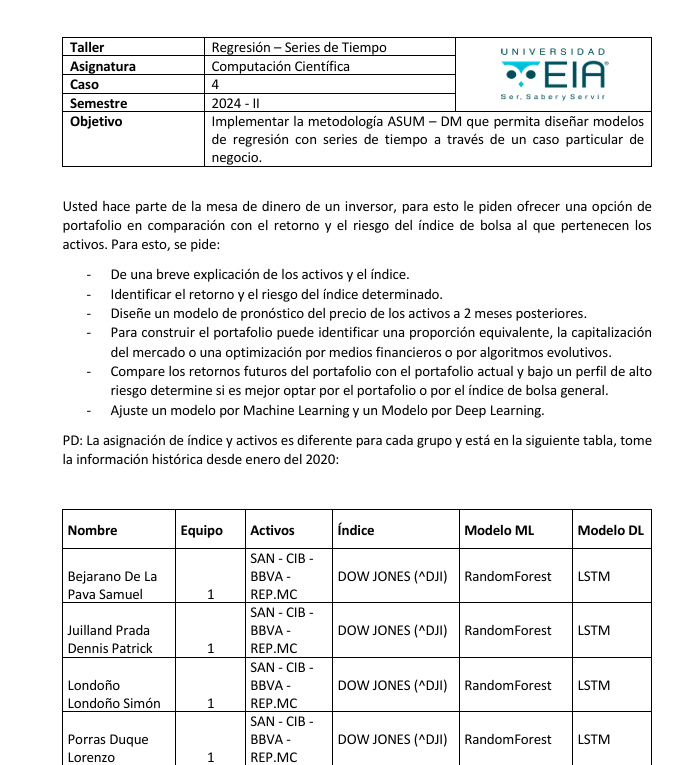

# **Integrantes:**

* Lorenzo Porras Duque
* Dennis Juilland
* Simon Londoño 
* Samuel Bejarano 

# **Descripcion de los activos:**

* SAN (Banco Santander, S.A.):
Banco Santander es uno de los bancos más grandes de Europa y tiene su sede en España. Opera en varios países y es conocido por su gran presencia en América Latina, particularmente en Brasil y México, además de su fuerte presencia en Europa.
La acción SAN se refiere al ticker de Banco Santander en la bolsa de Madrid y es un activo financiero que representa la propiedad parcial de la empresa.

* CIB (Bancolombia S.A.):
Bancolombia es uno de los bancos más grandes de Colombia y un actor financiero importante en la región andina.
Su ticker en la Bolsa de Valores de Nueva York (NYSE) es CIB, y representa las acciones de la entidad en el mercado estadounidense. Esta acción permite a inversores extranjeros invertir en una de las instituciones financieras más grandes de Colombia.

* BBVA (Banco Bilbao Vizcaya Argentaria, S.A.):
BBVA es otro de los bancos más grandes de España y tiene una fuerte presencia internacional, incluyendo operaciones en América Latina, los Estados Unidos y Turquía.
La acción BBVA representa la propiedad de esta entidad financiera en la bolsa española, y es una de las principales acciones bancarias en Europa y América Latina.

* REP.MC (Repsol S.A.):
Repsol es una multinacional energética y petroquímica con sede en España, involucrada en la exploración, producción, refinación y comercialización de petróleo y gas.
El ticker REP.MC se refiere a la acción de Repsol en la Bolsa de Madrid. Este activo es representativo del sector energético en España y en el mundo, siendo una de las empresas líderes en transición energética en Europa.

* Índice:
Dow Jones Industrial Average (^DJI):
El Dow Jones Industrial Average, comúnmente conocido como el Dow Jones o simplemente el Dow, es uno de los índices bursátiles más antiguos y conocidos de los Estados Unidos.
Está compuesto por 30 grandes empresas que cotizan en bolsa y representan una variedad de sectores de la economía estadounidense, excluyendo transporte y servicios públicos.
Este índice se utiliza ampliamente como un indicador de la salud económica de los Estados Unidos, y su desempeño a menudo se sigue para medir la confianza general en el mercado bursátil.

# **Librerias y Semilla:**

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,LSTM
from keras import utils
import keras
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms
import random


from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [8]:
utils.set_random_seed(42)

# **1. DJI**

In [123]:
data_dji = yf.download('^DJI', start='2020-01-01', end='2024-10-29')['Adj Close']

returns_dji = data_dji.pct_change().dropna()

average_daily_return = returns_dji.mean()
average_annual_return = average_daily_return * 252  # 252 días de a al año

daily_volatility = returns_dji.std()
annual_volatility = daily_volatility * np.sqrt(252)

average_annual_return = average_annual_return.item() if isinstance(average_annual_return, pd.Series) else average_annual_return
annual_volatility = annual_volatility.item() if isinstance(annual_volatility, pd.Series) else annual_volatility

# Imprimir los resultados
print(f"Retorno promedio anual del Dow Jones: {average_annual_return:.4%}")
print(f"Riesgo (volatilidad anual) del Dow Jones: {annual_volatility:.4%}")

[*********************100%***********************]  1 of 1 completed

Retorno promedio anual del Dow Jones: 10.1955%
Riesgo (volatilidad anual) del Dow Jones: 20.9867%


# **2. Contruccion Portafolios**

## **2.1. Extraccion de los datos:**

In [10]:
activos=['SAN','CIB','BBVA','REP.MC']
data=pd.DataFrame()
for i in activos:
  data[i]=yf.download(i,start='2020-01-01',end='2024-10-29')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2020-01-02 00:00:00+00:00 to 2024-10-28 00:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     1214 non-null   float64
 1   CIB     1214 non-null   float64
 2   BBVA    1214 non-null   float64
 3   REP.MC  1204 non-null   float64
dtypes: float64(4)
memory usage: 47.4 KB


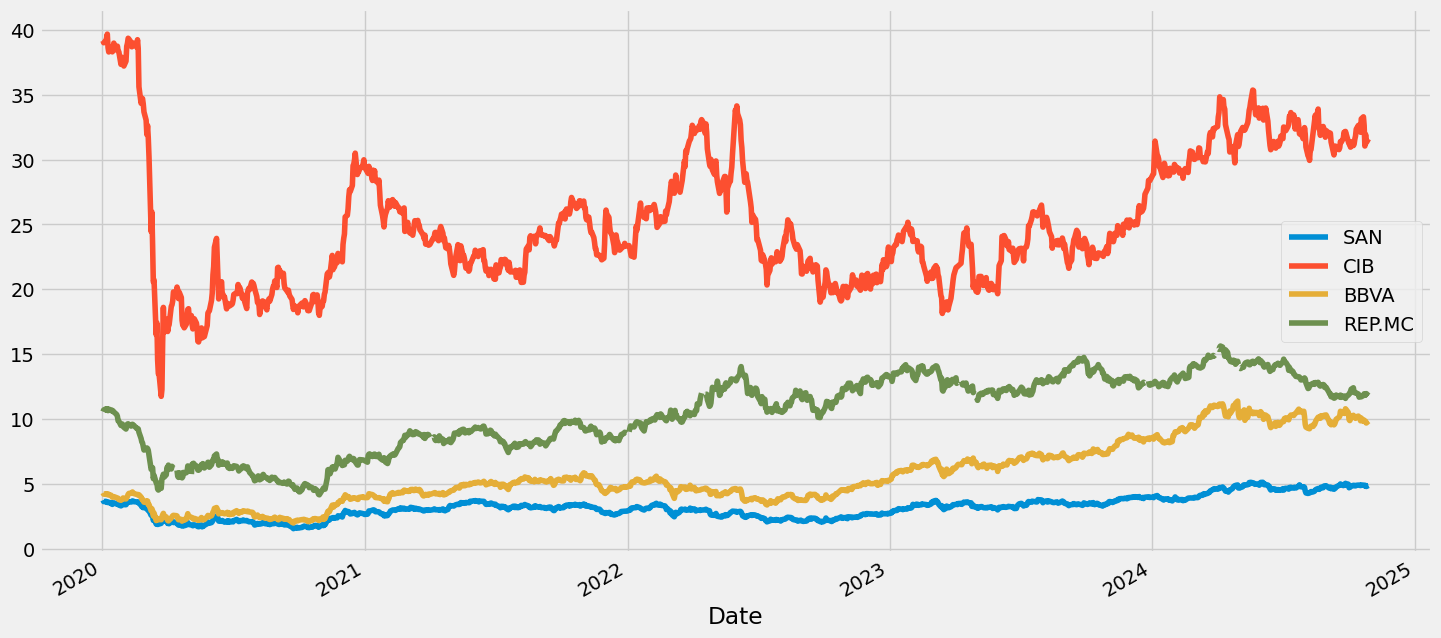

In [12]:
data.plot(figsize=(16,8))
plt.show()

Tenemos problemas por que el REP.MC tiene valores nulos

## **2.2. Portfolio:**

### **2.2.1. Retorno Simple:**

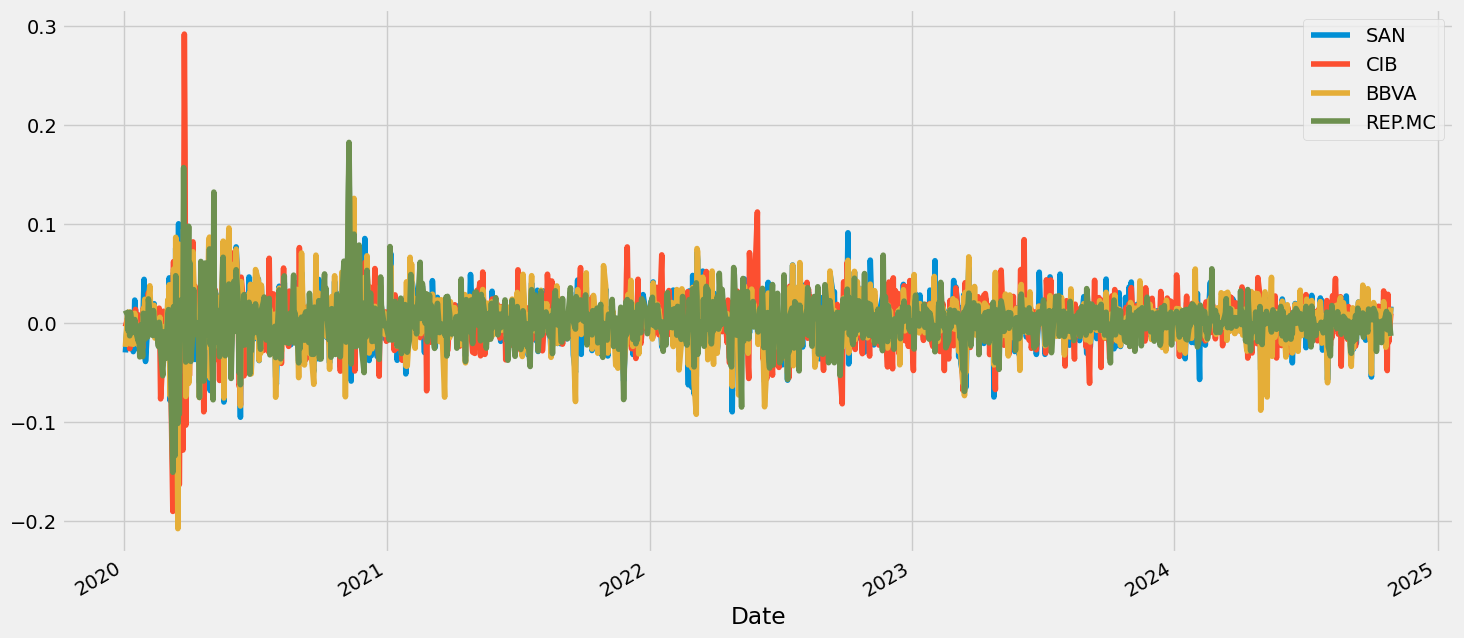

In [106]:
ret_simple=data.pct_change().dropna()
ret_simple.plot(figsize=(16,8))
plt.show()

### **2.2.2. Retorno Logaritmico:**

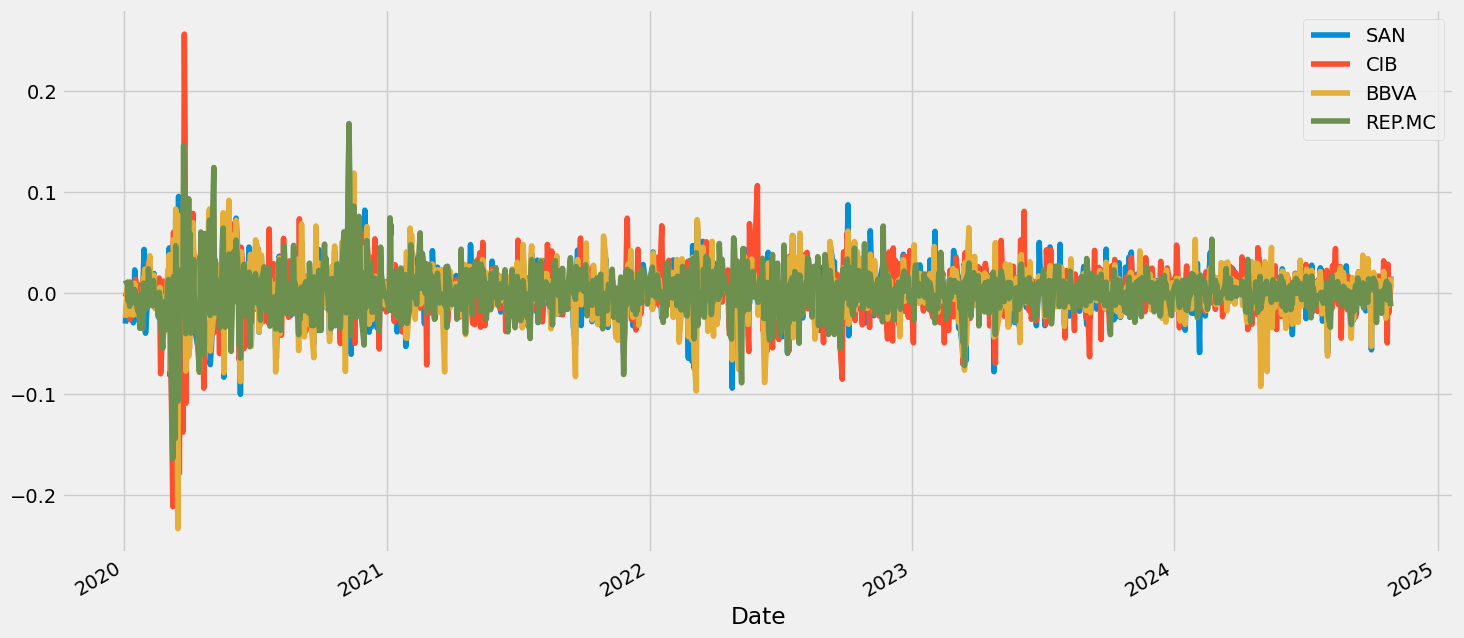

In [107]:
ret_log=np.log(data).diff().dropna()
ret_log.plot(figsize=(16,8))
plt.show()

### **2.2.3. Proporción Equivalente Por Algoritmos evolutivos:**

In [ ]:
def evaluar_portafolio(individuo, ret_simple, ret_log):
  pesos = np.array(individuo) / np.sum(individuo)
  rentabilidad = np.dot(ret_simple.mean() * 252, pesos)
  riesgo = np.sqrt(np.dot(np.transpose(pesos), np.dot(ret_log.cov()*252, pesos)))

  return rentabilidad, riesgo,

In [33]:
toolbox = base.Toolbox()

In [34]:
creator.create("FitnessMulti", base.Fitness, weights=(0.5,-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMulti)

In [35]:
toolbox.register("attribute", random.uniform, 100, 1000)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=4)

In [36]:
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [39]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint) 
toolbox.register("mutate", tools.mutGaussian, mu=200, sigma=1, indpb=0.1) 

toolbox.register("evaluate", evaluar_portafolio, ret_simple = ret_simple, ret_log = ret_log)

In [40]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Promedio', np.mean)
stats.register('Desviacion Estandar', np.std)
stats.register('Minimo', np.min)
stats.register('Maximo', np.max)

In [44]:
# Inicializar la poblacion
population = toolbox.population(n = 1000)

# Activar el algoritmo genetico
population, logbook = algorithms.eaSimple(population, toolbox, cxpb = 1, mutpb = 0.1, ngen = 100, verbose = False, stats = stats)
print('El resultado de la evolucion: ')
print(logbook)
print('El individuo que optimiza el beneficio es: ')
print(tools.selBest(population, 1) [0])


El resultado de la evolucion: 
gen	nevals	Promedio	Desviacion Estandar	Minimo   	Maximo  
0  	1000  	0.232595	0.101655           	0.0847842	0.371641
1  	1000  	0.245005	0.0958731          	0.103054 	0.376467
2  	1000  	0.256269	0.0926525          	0.108726 	0.37846 
3  	1000  	0.265977	0.0903626          	0.135107 	0.378763
4  	1000  	0.273504	0.0878749          	0.150321 	0.379922
5  	1000  	0.279098	0.0857792          	0.158715 	0.381907
6  	1000  	0.284392	0.0841361          	0.173443 	0.385686
7  	1000  	0.288767	0.0829662          	0.172595 	0.387158
8  	1000  	0.292525	0.0824471          	0.176537 	0.389797
9  	1000  	0.296057	0.0820671          	0.183323 	0.390536
10 	1000  	0.2991  	0.0818461          	0.187489 	0.391665
11 	1000  	0.301955	0.0816905          	0.195615 	0.391003
12 	1000  	0.304687	0.0815417          	0.195521 	0.39394 
13 	1000  	0.306802	0.0814056          	0.195519 	0.395378
14 	1000  	0.308363	0.0813217          	0.198062 	0.395378
15 	1000  	0.309706	0.081

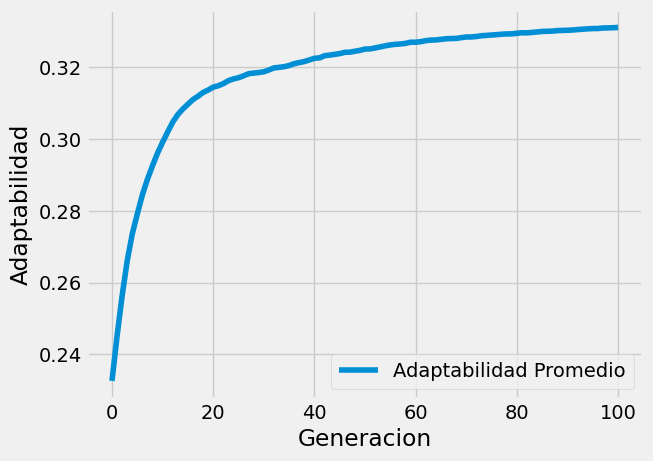

In [45]:
gen = logbook.select('gen')
avgs = logbook.select('Promedio')
plt.plot(gen, avgs, label = 'Adaptabilidad Promedio')
plt.legend()
plt.xlabel('Generacion')
plt.ylabel('Adaptabilidad')
plt.show()

In [46]:
mejor_individuo = tools.selBest(population, 1) [0]
mejor_individuo/np.sum(mejor_individuo)

array([0.01458931, 0.01454925, 0.95609086, 0.01477058])

### **2.2.4. Rentabilidad de perfil alto riesgo:**

In [110]:
pesos= [0.01458931,0.01454925,0.95609086,0.01477058]
rentabilidad_portafolio=np.dot(ret_simple.mean()*252,pesos)
riesgo_portafolio=np.sqrt(np.dot(np.transpose(pesos),np.dot(ret_log.cov()*252,pesos)))
print('Riesgo del portafolio:',riesgo_portafolio)
print('Rentabilidad del portafolio:',rentabilidad_portafolio)

Riesgo del portafolio: 0.41266165476911115
Rentabilidad del portafolio: 0.2506040990849493


### **2.2.5. Retronos Anuales Portafolio Actual**

In [109]:
pesos= [0.25,0.25,0.25,0.25]
rentabilidad_portafolio=np.dot(ret_simple.mean()*252,pesos)
riesgo_portafolio=np.sqrt(np.dot(np.transpose(pesos),np.dot(ret_log.cov()*252,pesos)))
print('Riesgo del portafolio:',riesgo_portafolio)
print('Rentabilidad del portafolio:',rentabilidad_portafolio)

Riesgo del portafolio: 0.3280849042813401
Rentabilidad del portafolio: 0.132446298452261


# **3. Tratamiento de datos**

In [19]:
data_pronostico = data.asfreq('D').ffill()

In [20]:
data_pronostico.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2020-01-02 00:00:00+00:00 to 2024-10-28 00:00:00+00:00
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     1762 non-null   float64
 1   CIB     1762 non-null   float64
 2   BBVA    1762 non-null   float64
 3   REP.MC  1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


Como se observa ya tenemos todos los datos completos

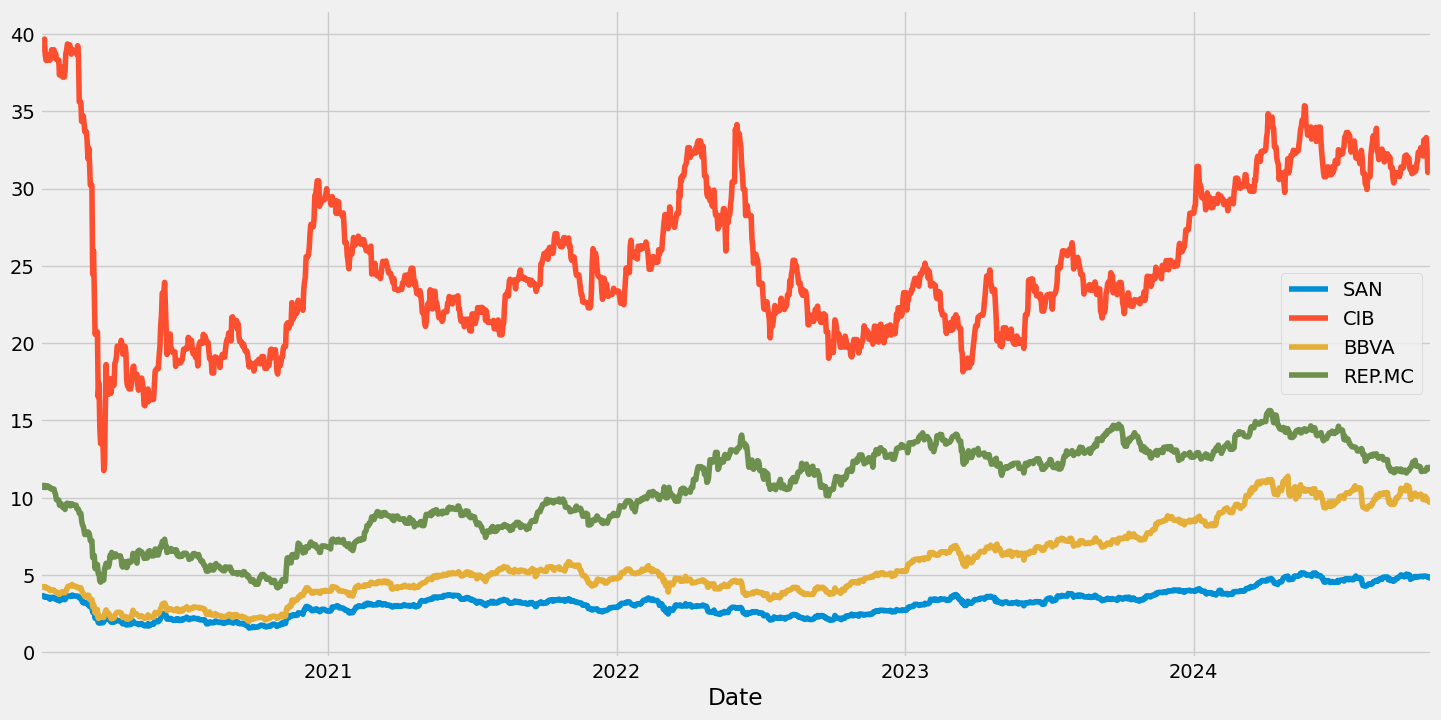

In [21]:
data_pronostico.plot(figsize=(16,8))
plt.show()

# **4. Series de tiempo**


Backtesting para el activo: SAN
Information of backtesting process
----------------------------------
Number of observations used for initial training: 1702
Number of observations used for backtesting: 60
    Number of folds: 1
    Number skipped folds: 0 
    Number of steps per fold: 60
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2020-01-02 00:00:00+00:00 -- 2024-08-29 00:00:00+00:00  (n=1702)
    Validation: 2024-08-30 00:00:00+00:00 -- 2024-10-28 00:00:00+00:00  (n=60)



  0%|          | 0/1 [00:00<?, ?it/s]

Métricas para el activo SAN:
   mean_absolute_error
0              0.12376



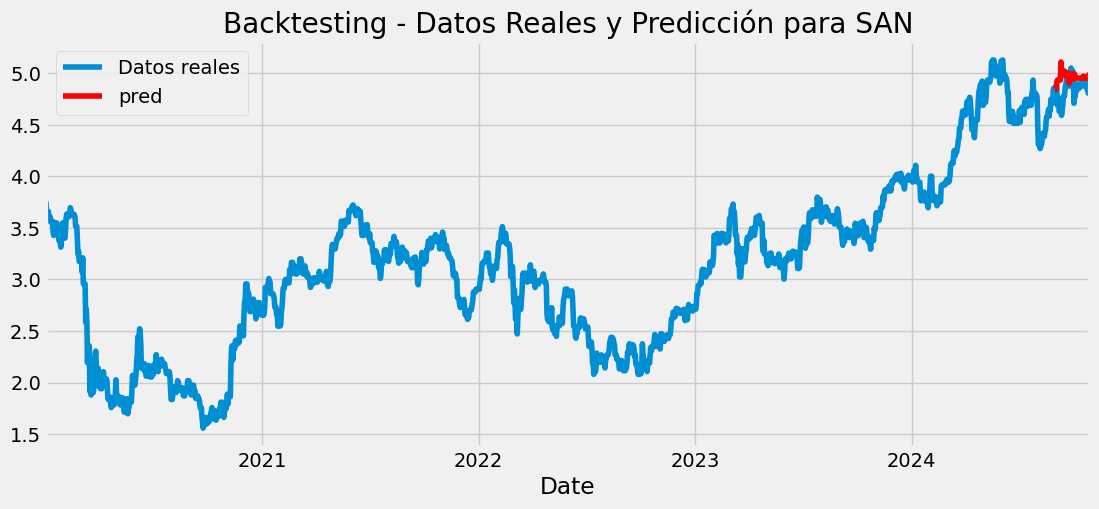

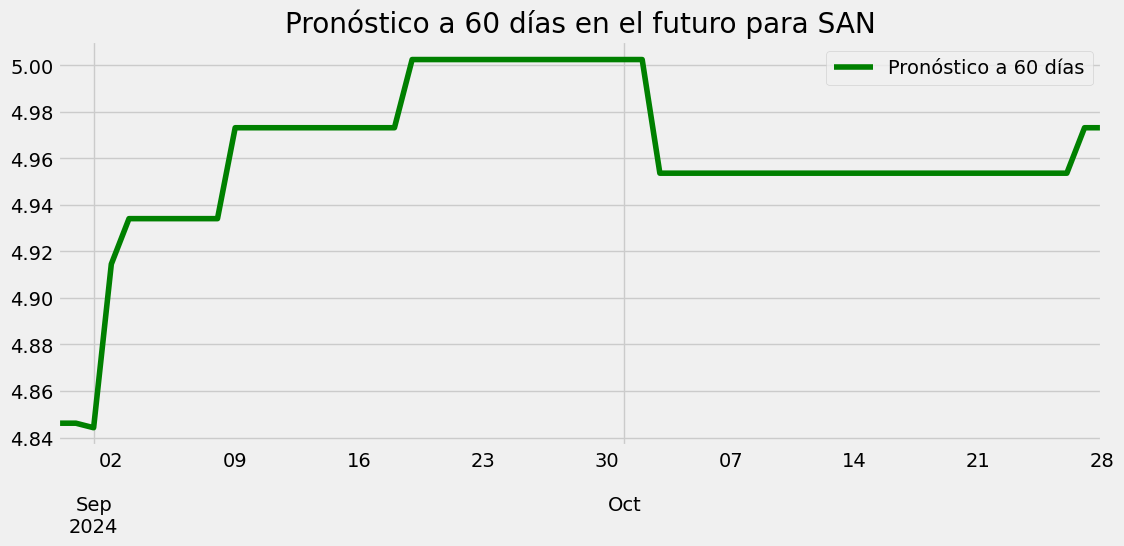


Backtesting para el activo: CIB
Information of backtesting process
----------------------------------
Number of observations used for initial training: 1702
Number of observations used for backtesting: 60
    Number of folds: 1
    Number skipped folds: 0 
    Number of steps per fold: 60
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2020-01-02 00:00:00+00:00 -- 2024-08-29 00:00:00+00:00  (n=1702)
    Validation: 2024-08-30 00:00:00+00:00 -- 2024-10-28 00:00:00+00:00  (n=60)



  0%|          | 0/1 [00:00<?, ?it/s]

Métricas para el activo CIB:
   mean_absolute_error
0             0.938589



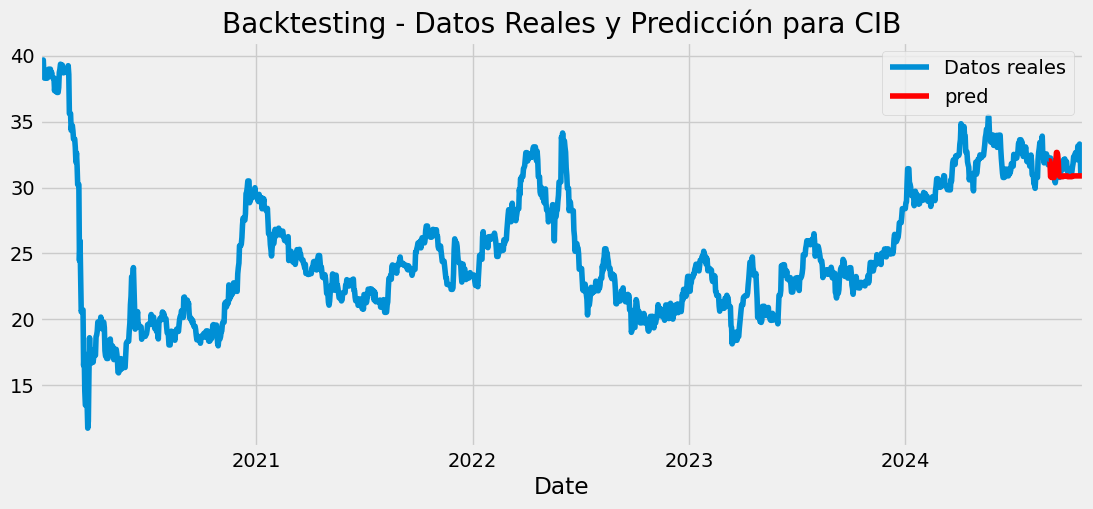

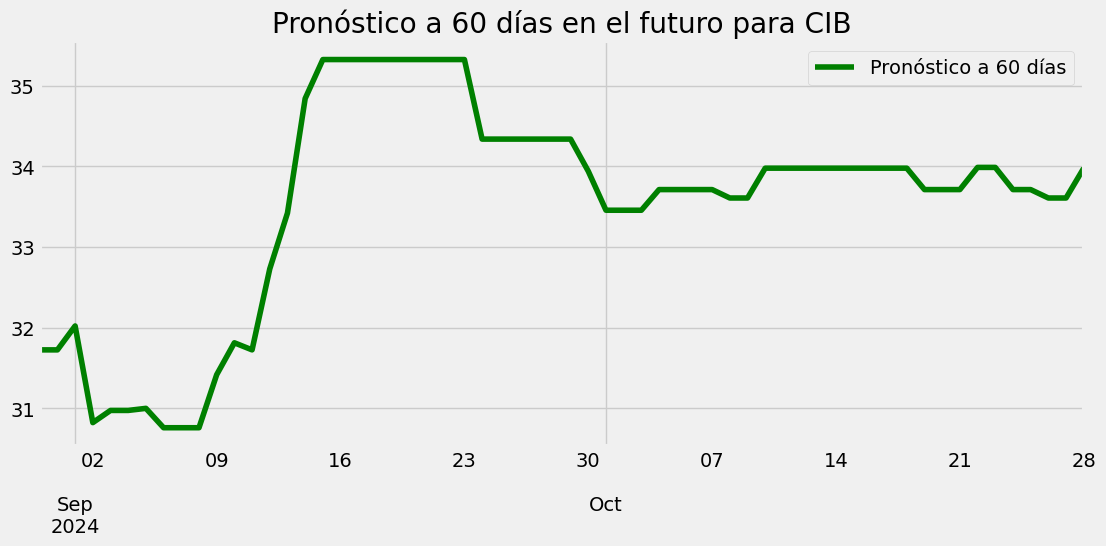


Backtesting para el activo: BBVA
Information of backtesting process
----------------------------------
Number of observations used for initial training: 1702
Number of observations used for backtesting: 60
    Number of folds: 1
    Number skipped folds: 0 
    Number of steps per fold: 60
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2020-01-02 00:00:00+00:00 -- 2024-08-29 00:00:00+00:00  (n=1702)
    Validation: 2024-08-30 00:00:00+00:00 -- 2024-10-28 00:00:00+00:00  (n=60)



  0%|          | 0/1 [00:00<?, ?it/s]

Métricas para el activo BBVA:
   mean_absolute_error
0             0.431192



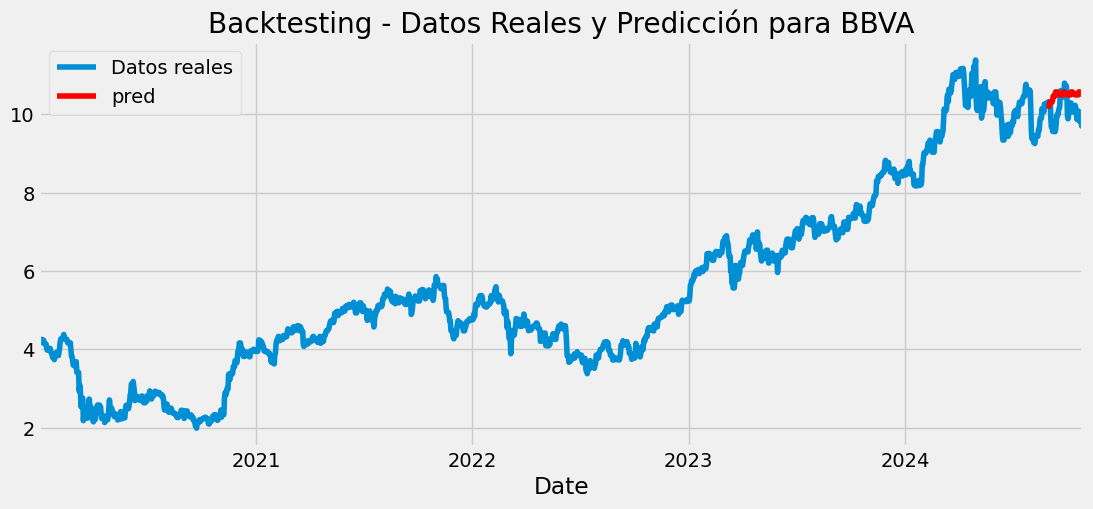

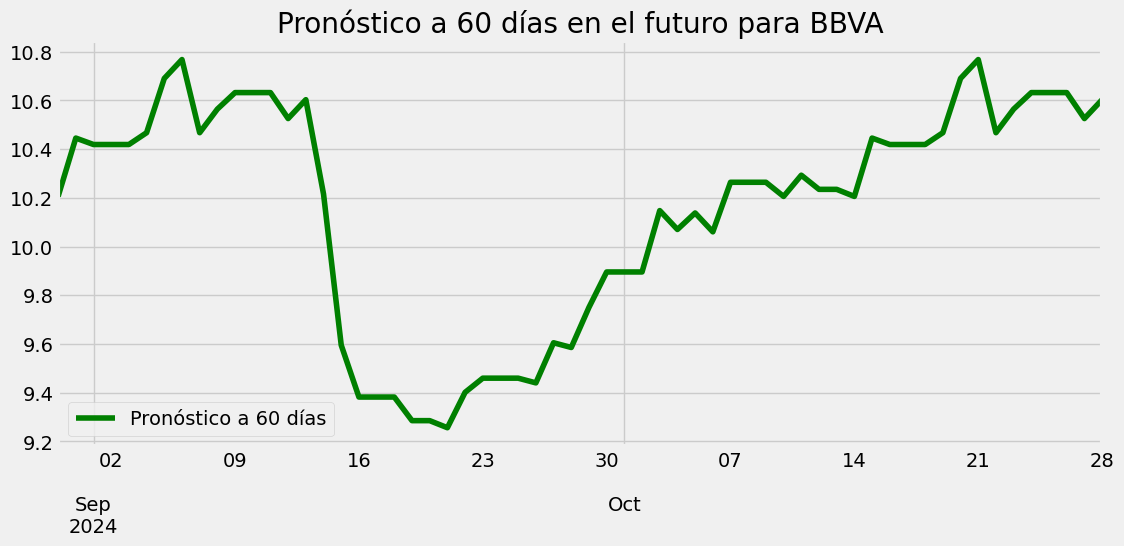


Backtesting para el activo: REP.MC
Information of backtesting process
----------------------------------
Number of observations used for initial training: 1702
Number of observations used for backtesting: 60
    Number of folds: 1
    Number skipped folds: 0 
    Number of steps per fold: 60
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2020-01-02 00:00:00+00:00 -- 2024-08-29 00:00:00+00:00  (n=1702)
    Validation: 2024-08-30 00:00:00+00:00 -- 2024-10-28 00:00:00+00:00  (n=60)



  0%|          | 0/1 [00:00<?, ?it/s]

Métricas para el activo REP.MC:
   mean_absolute_error
0              0.38247



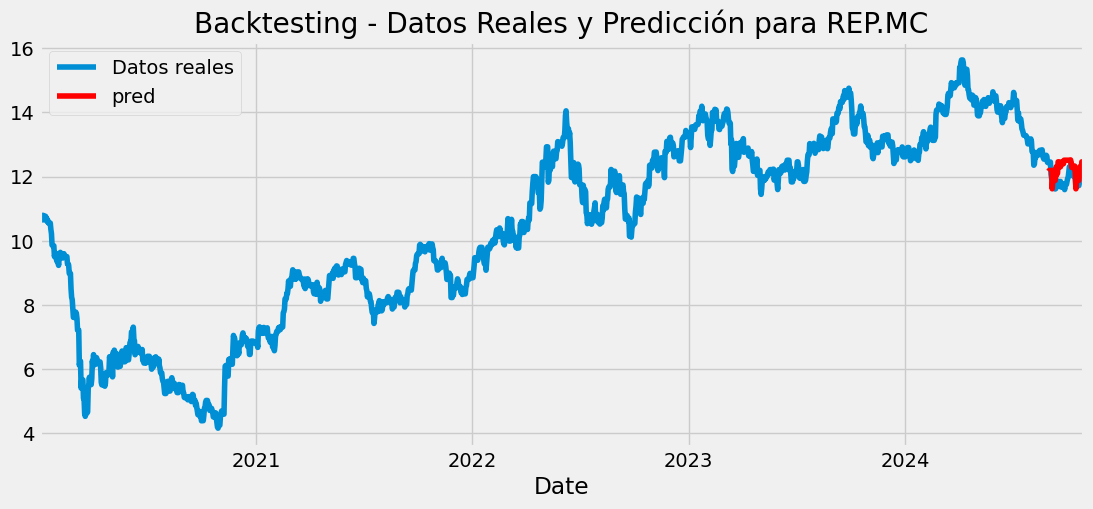

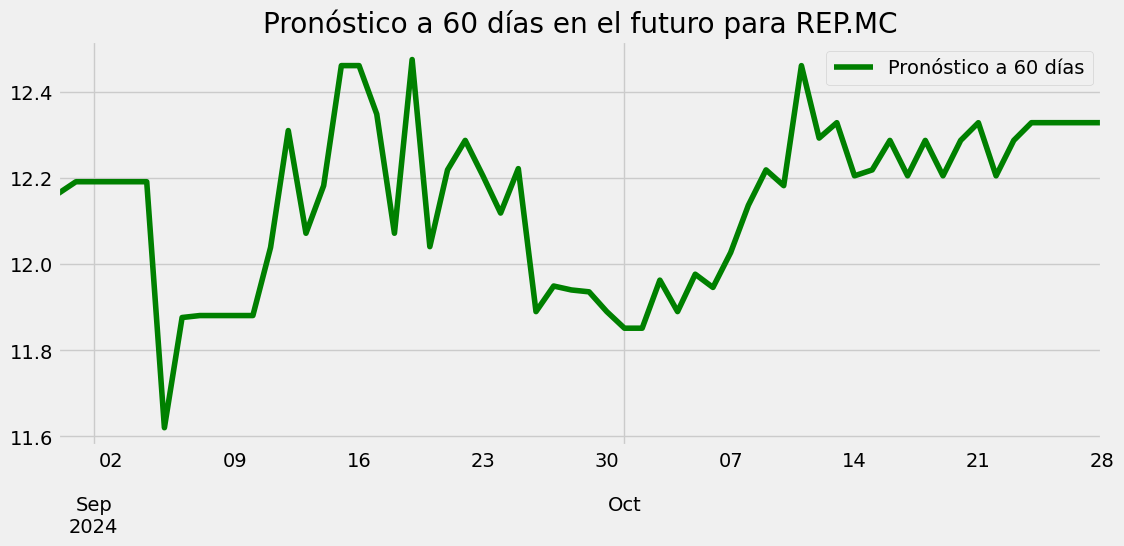

In [ ]:
def backtesting_activos_con_forecast(data, activos, steps=60, lags=24, metric='mean_absolute_error'):
    """
    Realiza el backtesting de los próximos valores de precios ajustados para varios activos
    y predice 60 días adicionales al final de la serie.
    
    Parámetros:
    - data: DataFrame con los precios ajustados de los activos.
    - activos: Lista con los nombres de las columnas de los activos en el DataFrame.
    - steps: Número de pasos a predecir en cada ciclo de backtesting.
    - lags: Número de lags para el modelo autorregresivo.
    - metric: Métrica de evaluación (por defecto es mean_absolute_error).
    
    Retorna:
    - resultados: Diccionario con las métricas y predicciones para cada activo.
    """
    
    resultados = {}
    
    for activo in activos:
        print(f"\nBacktesting para el activo: {activo}")
        
        # Selección de la serie del activo
        serie = data[activo]
        
        # División de la serie en conjunto de entrenamiento y prueba
        data_train, data_test = serie[:-steps], serie[-steps:]
        
        # Configuración del forecaster con DecisionTreeRegressor y MinMaxScaler
        forecaster = ForecasterAutoreg(
            regressor=DecisionTreeRegressor(),
            lags=lags,
            transformer_y=MinMaxScaler()
        )
        
        # Entrenar el modelo
        forecaster.fit(y=data_train)
        
        # Realizar el backtesting
        metrica, predicciones = backtesting_forecaster(
            forecaster=forecaster,
            y=serie,
            initial_train_size=len(data_train),
            fixed_train_size=False,
            steps=steps,
            metric=metric,
            verbose=True,
            refit=False
        )
        
        # Guardar los resultados para el activo
        resultados[activo] = {
            'metrica': metrica,
            'predicciones': predicciones
        }
        
        # Mostrar la métrica de error (imprimir el DataFrame completo)
        print(f"Métricas para el activo {activo}:\n{metrica}\n")
        
        # Predicción a 60 días en el futuro
        forecast_60_days = forecaster.predict(steps=60)
        
        # Gráfico 1: Datos de entrenamiento y predicciones de backtesting
        fig, ax = plt.subplots(figsize=(12, 5))
        serie.plot(ax=ax, label='Datos reales')
        predicciones.plot(ax=ax, label='Pronósticos (backtesting)', color='red')
        
        ax.set_title(f'Backtesting - Datos Reales y Predicción para {activo}')
        ax.legend()
        plt.show()
        
        # Gráfico 2: Pronóstico a 60 días en el futuro
        fig, ax = plt.subplots(figsize=(12, 5))
        forecast_60_days.plot(ax=ax, label='Pronóstico a 60 días', color='green')
        
        ax.set_title(f'Pronóstico a 60 días en el futuro para {activo}')
        ax.legend()
        plt.show()
    
    return resultados

# Llamada a la función con tus datos
activos = ['SAN', 'CIB', 'BBVA', 'REP.MC']
resultados = backtesting_activos_con_forecast(data_pronostico, activos, steps=60, lags=24, metric='mean_absolute_error')

# **5. Portafolio Normal vs Portafolio Alto Riesgo vs Indice a 2 meses**

## **5.1. Datos a 2 meses por cada activo**

In [ ]:
activos=['SAN','CIB','BBVA','REP.MC']
data=pd.DataFrame()
for i in activos:
  data[i]=yf.download(i,start='2020-01-01',end='2024-10-29')['Adj Close']

In [83]:
data_2meses=pd.DataFrame()
for i in activos:
    data_2meses[i]=resultados[i]['predictions']


In [85]:
data_2meses.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2024-08-30 00:00:00+00:00 to 2024-10-28 00:00:00+00:00
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     60 non-null     float64
 1   CIB     60 non-null     float64
 2   BBVA    60 non-null     float64
 3   REP.MC  60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


<Axes: >

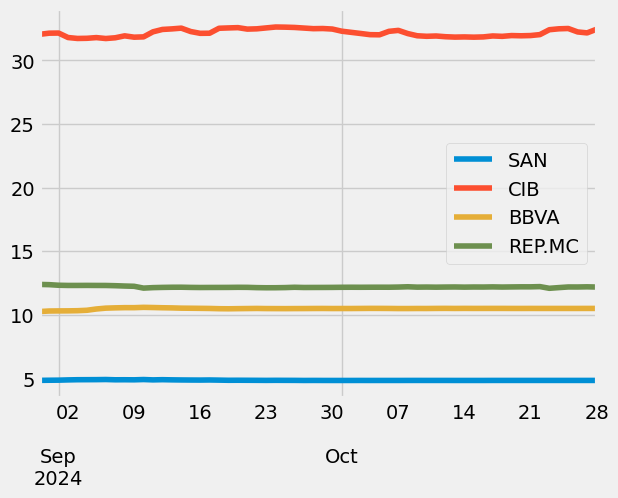

In [92]:
data_2meses.plot()

## **5.2 Evaluacion de portafolios**

### **5.2.1. Retorno Simple a 2 Meses**

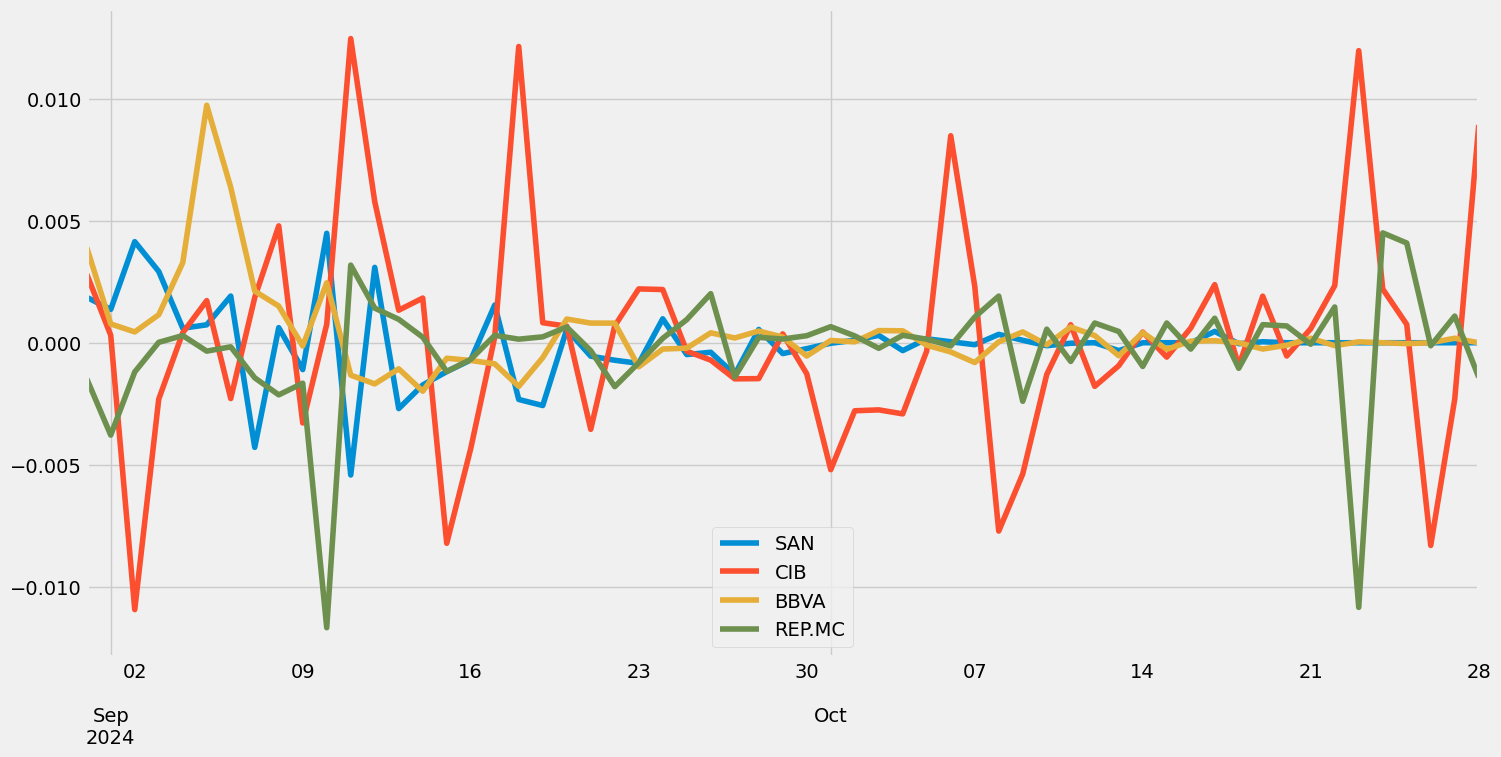

In [111]:
ret_simple=data_2meses.pct_change().dropna()
ret_simple.plot(figsize=(16,8))
plt.show()

### **5.2.2. Retorno Logaritmico a 2 Meses**

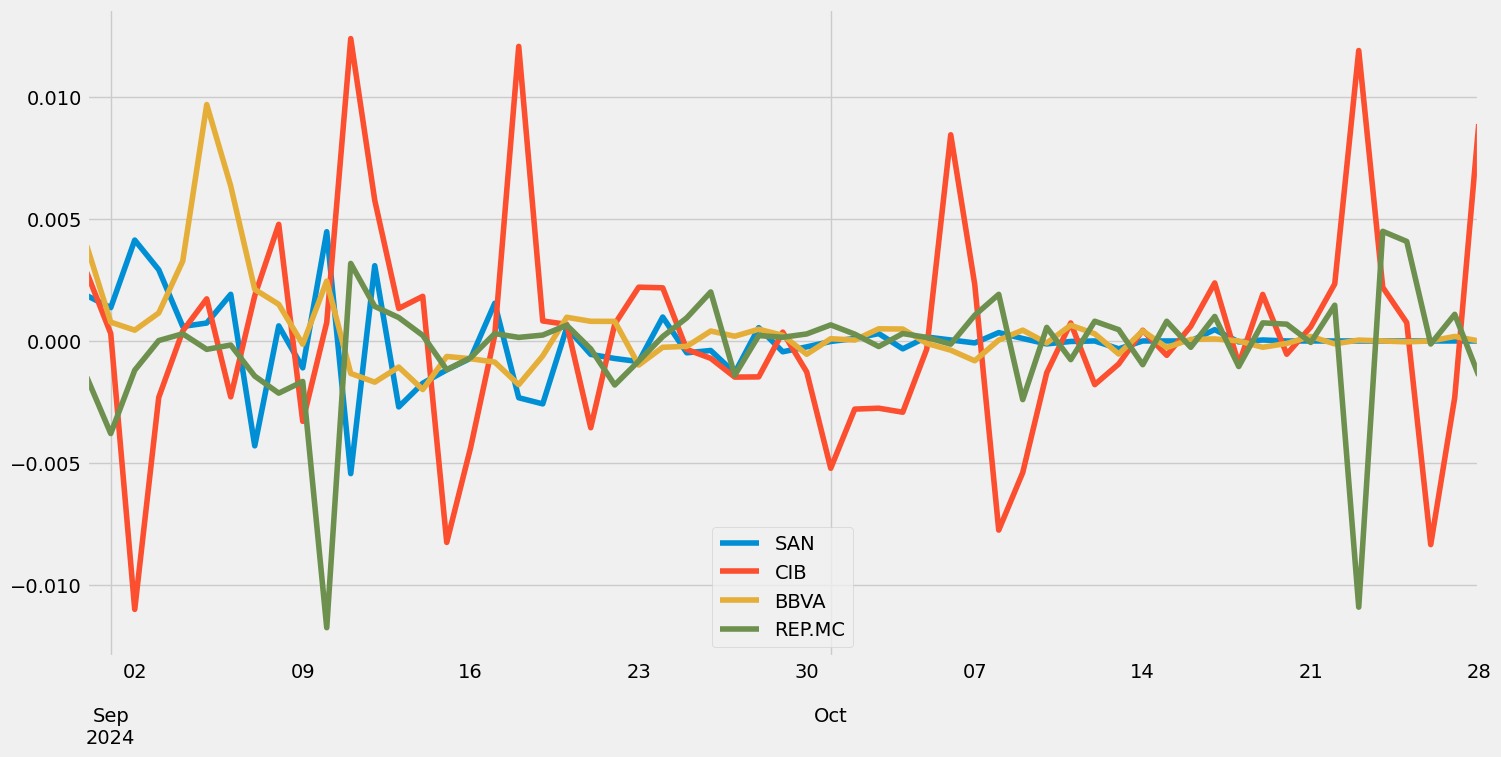

In [112]:
ret_log=np.log(data_2meses).diff().dropna()
ret_log.plot(figsize=(16,8))
plt.show()

## **5.3. Portafolio Actual**

In [113]:
pesos= [0.25,0.25,0.25,0.25]
rentabilidad_portafolio=np.dot(ret_simple.mean()*60,pesos)
riesgo_portafolio=np.sqrt(np.dot(np.transpose(pesos),np.dot(ret_log.cov()*60,pesos)))
print('Riesgo del portafolio:',riesgo_portafolio)
print('Rentabilidad del portafolio:',rentabilidad_portafolio)

Riesgo del portafolio: 0.009028824514330817
Rentabilidad del portafolio: 0.004826724766872596


## **5.4. Portafolio Alto Riesgo**

In [115]:
pesos= [0.01458931,0.01454925,0.95609086,0.01477058]
rentabilidad_portafolio=np.dot(ret_simple.mean()*60,pesos)
riesgo_portafolio=np.sqrt(np.dot(np.transpose(pesos),np.dot(ret_log.cov()*60,pesos)))
print('Riesgo del portafolio:',riesgo_portafolio)
print('Rentabilidad del portafolio:',rentabilidad_portafolio)

Riesgo del portafolio: 0.013274103499430165
Rentabilidad del portafolio: 0.022859163851380964


## **5.5. Indice a 2 meses:**

In [128]:
data_dji = yf.download('^DJI', start='2020-01-01', end='2024-10-29')['Adj Close']

returns_dji = data_dji.pct_change().dropna()

average_daily_return = returns_dji.mean()
average_annual_return = average_daily_return * 60 

daily_volatility = returns_dji.std()
annual_volatility = daily_volatility * np.sqrt(60)

average_annual_return = average_annual_return.item() if isinstance(average_annual_return, pd.Series) else average_annual_return
annual_volatility = annual_volatility.item() if isinstance(annual_volatility, pd.Series) else annual_volatility

# Imprimir los resultados
print(f"Retorno promedio bimestral del Dow Jones: {average_annual_return:.4%}")
print(f"Riesgo (volatilidad bimestral) del Dow Jones: {annual_volatility:.4%}")

[*********************100%***********************]  1 of 1 completed

Retorno promedio bimestral del Dow Jones: 2.4275%
Riesgo (volatilidad bimestral) del Dow Jones: 10.2405%


## **5.6. Conclusion:**

Para un inversionista de perfil de alto riesgo, el **Portafolio de Alto Riesgo** es la opción preferida, ya que ofrece una rentabilidad significativamente mayor en comparación con el Portafolio Actual, a pesar de su mayor riesgo. Este portafolio proporciona una oportunidad de rendimiento superior que está alineada con la disposición del inversionista a asumir riesgos elevados, superando incluso el retorno bimestral del índice Dow Jones.

# **6. Modelos**

## **6.1 Modelo RandomForest:**

In [23]:
def prediccion_activos(data, activos, steps=60, lags=30):

    resultados = {}
    
    for activo in activos:
        # Selección de los datos para el activo actual
        serie = data_pronostico[activo]

        # Dividir los datos en entrenamiento y prueba
        data_train, data_test = serie[:-steps], serie[-steps:]

        # Crear y entrenar el modelo autorregresivo
        forecaster = ForecasterAutoreg(
            regressor=RandomForestRegressor(n_estimators=100, random_state=42),
            lags=lags
        )
        
        forecaster.fit(y=data_train)

        # Predicción para los próximos 60 días
        predictions = forecaster.predict(steps=steps)
        
        # Guardar los resultados para evaluación
        resultados[activo] = {
            'test': data_test,
            'predictions': predictions,
            'error': mean_absolute_error(data_test, predictions)  # RMSE
        }

        # Mostrar el error de predicción
        print(f'Activo: {activo}, Error de predicción (MAE) : {resultados[activo]["error"]}')
        
        # Graficar los resultados
        plt.figure(figsize=(10, 5))
        plt.plot(data_train.index, data_train, label='Entrenamiento')
        plt.plot(data_test.index, data_test, label='Prueba')
        plt.plot(predictions.index, predictions, label='Predicción', color='red')
        plt.legend()
        plt.xlabel('Fecha')
        plt.ylabel('Precio Ajustado')
        plt.title(f'Predicción de Precios Ajustados para {activo}')
        plt.show()

    return resultados


Activo: SAN, Error de predicción (MAE) : 0.09354556465148918


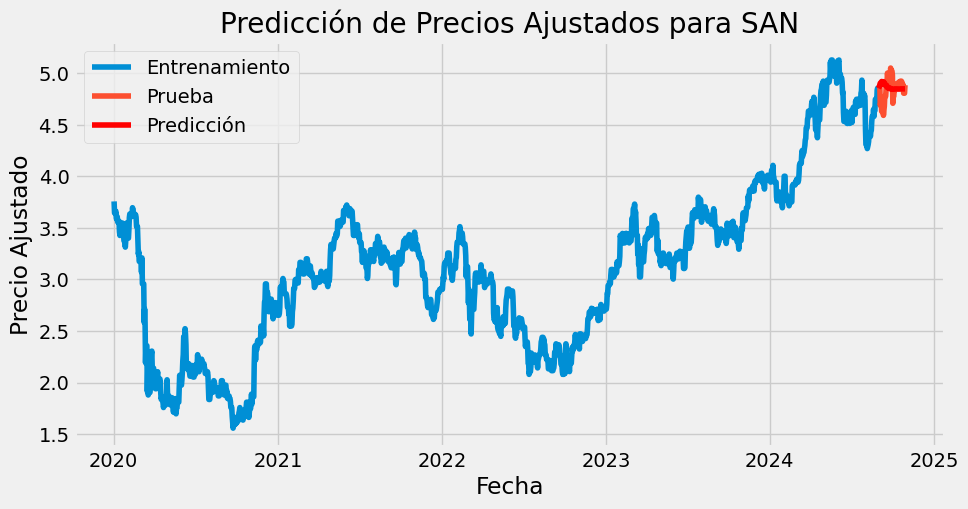

Activo: CIB, Error de predicción (MAE) : 0.8243100668589273


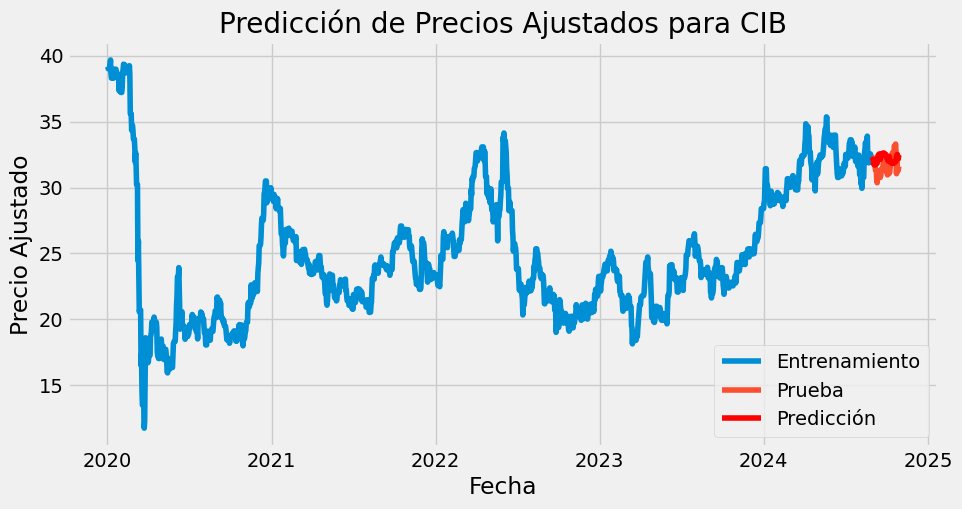

Activo: BBVA, Error de predicción (MAE) : 0.43513017511367796


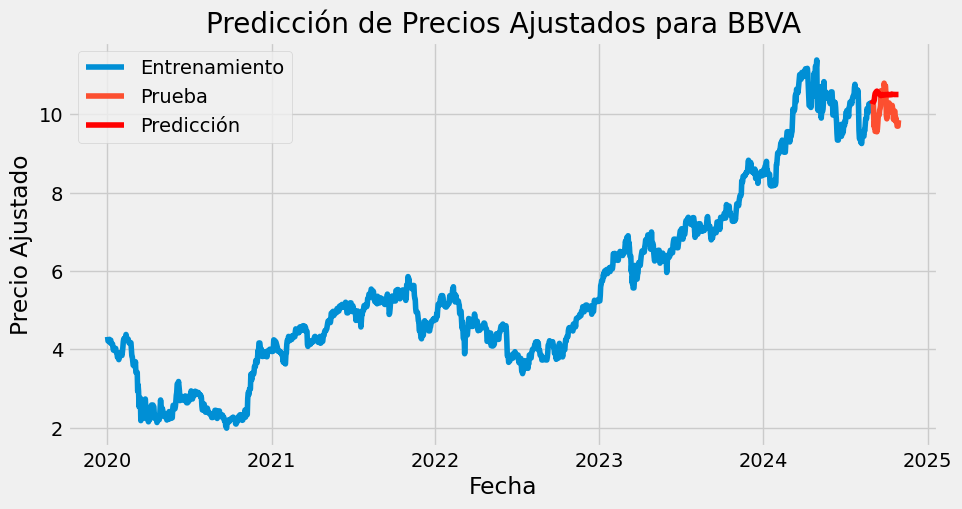

Activo: REP.MC, Error de predicción (MAE) : 0.326625671227773


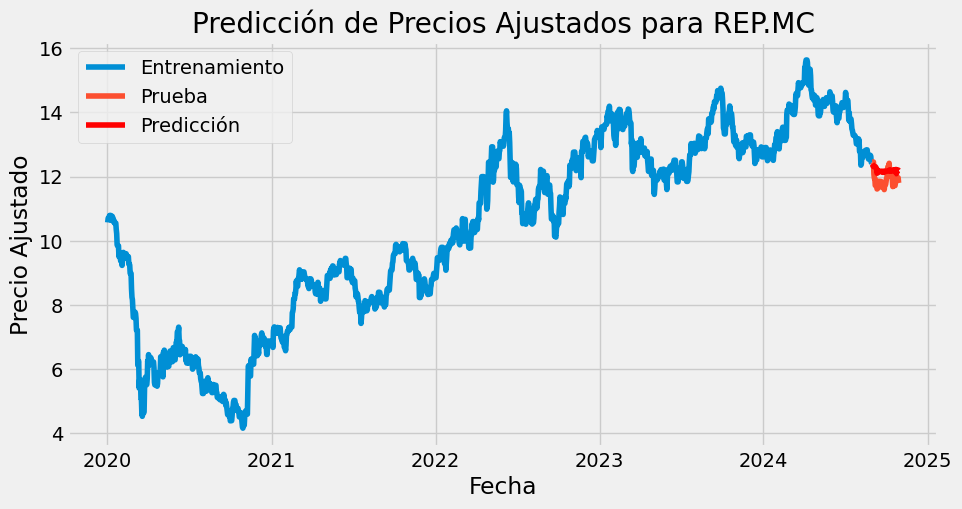

In [24]:
activos = ['SAN', 'CIB', 'BBVA', 'REP.MC']
resultados = prediccion_activos(data, activos, steps=60, lags=30)

## **6.2 LSTM:**

In [25]:
steps=60
def modelo_lstm():
    modelo=Sequential()
    modelo.add(LSTM(steps,input_shape=(1,steps),activation='tanh'))
    modelo.add(Flatten())
    modelo.add(Dense(1,activation='tanh'))
    modelo.compile(loss='mean_absolute_error',optimizer="Adam",metrics = ['mae'])
    modelo.summary()

    return modelo

In [26]:
def serie_a_supervisado(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    #Secuencia de entrada (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    #Secuencia de pronósticos (t, t+1, ... ,t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    #Agregar los frames
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    #Eliminar filas con datos nulos
    if dropnan:
        agg.dropna(inplace = True)
    return agg

In [27]:
def agregar_valor(X_test,nuevo_valor):
    for i in range(X_test.shape[2]-1):
        X_test[0][0][i]=X_test[0][0][i+1]
    X_test[0][0][X_test.shape[2]-1]=nuevo_valor
    return X_test

In [28]:
def procesar_y_predecir(data_pronostico, columna, steps=1):
    # Configurar los valores de la columna específica y normalizar
    values = data_pronostico[columna].values.astype('float64')
    scaler = MinMaxScaler()
    values = values.reshape(-1, 1)
    scaled_values = scaler.fit_transform(values)

    # Reestructurar los datos a un formato supervisado
    reframed_data = serie_a_supervisado(scaled_values, steps, 1)

    # Dividir en conjuntos de entrenamiento y prueba
    n_train_days = round(reframed_data.shape[0] * 0.7)
    values = reframed_data.values
    train, test = values[:n_train_days, :], values[n_train_days:, :]

    X_train, y_train = train[:, :-1], train[:, -1]
    X_test, y_test = test[:, :-1], test[:, -1]

    # Reformatear a tensores de 3 dimensiones
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Crear y entrenar el modelo LSTM
    modelo = modelo_lstm()
    historia = modelo.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=steps)

    # Predecir y graficar los resultados de validación
    results = modelo.predict(X_test)
    plt.plot(y_test, c='g', label='Datos de Validación')
    plt.plot(results, c='b', label='Predicciones')
    plt.legend()
    plt.title(f'Predicciones vs Datos de Validación para {columna}')
    plt.show()

    error = mean_absolute_error(y_test, results)
    print(f"Error Medio Absoluto para {columna}: {error}")

    # Pronóstico para los próximos 60 días
    last_data = data_pronostico[columna]['2024-08-28':].values.astype('float64').reshape(-1, 1)
    scaled_forecast = scaler.transform(last_data)
    reframed_forecast = serie_a_supervisado(scaled_forecast, steps, 1)

    # Eliminar la última columna para usarla como entrada del modelo
    reframed_forecast.drop(reframed_forecast[['var1(t)']],axis=1,inplace=True)

    values=reframed_forecast.values
    x_test=values[reframed_forecast.shape[0]-1:,:]
    x_test=x_test.reshape((1, 1, x_test.shape[1]))

    # Generar la serie de pronóstico
    result_forecast = []
    for _ in range(60):
        parcial = modelo.predict(x_test)
        result_forecast.append(parcial[0])
        x_test = agregar_valor(x_test, parcial[0])

    # Invertir la normalización y graficar el pronóstico
    valores = np.array(result_forecast).reshape(-1, 1)
    inverse = scaler.inverse_transform(valores)
    plt.plot(inverse)
    plt.title(f'Pronóstico a 60 días para {columna}')
    plt.show()

### SAN Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,101 (113.68 KB)

 Trainable params: 29,101 (113.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1852 - mae: 0.1852 - val_loss: 0.2103 - val_mae: 0.2103
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mae: 0.0639 - val_loss: 0.1660 - val_mae: 0.1660
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - mae: 0.0479 - val_loss: 0.1269 - val_mae: 0.1269
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0390 - mae: 0.0390 - val_loss: 0.0896 - val_mae: 0.0896
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0348 - mae: 0.0348 - val_loss: 0.0892 - val_mae: 0.0892
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0318 - mae: 0.0318 - val_loss: 0.0932 - val_mae: 0.0932
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 - mae: 0.0308 - val_loss: 0.0880 - val_mae: 0.0880
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mae: 0.0308 - val_loss: 0.0785 - val_mae: 0.0785
Epoch 9/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - mae:

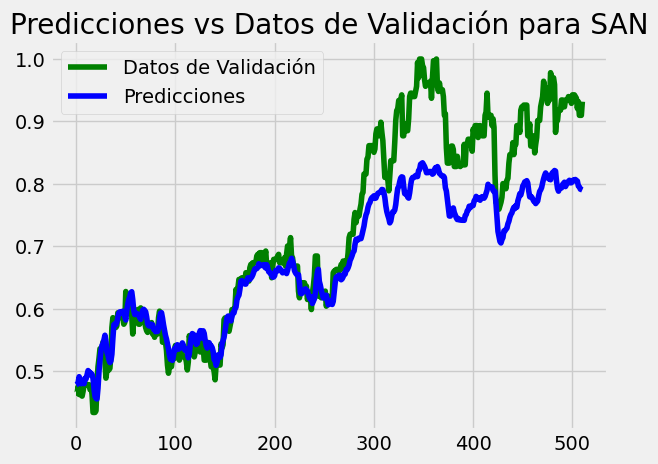

Error Medio Absoluto para SAN: 0.05753289084391548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

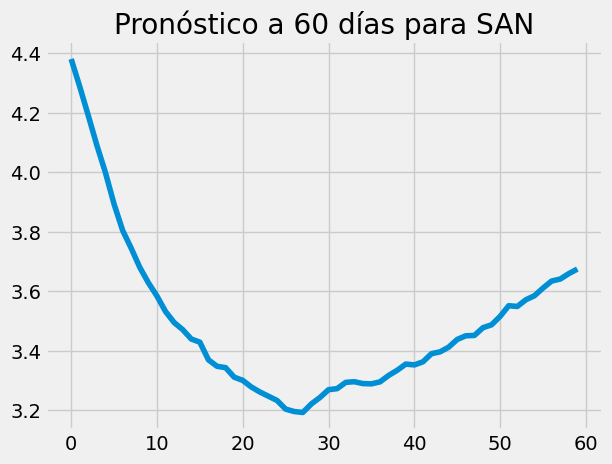

In [29]:
procesar_y_predecir(data_pronostico, 'SAN', steps=60)

### CIB Model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,101 (113.68 KB)

 Trainable params: 29,101 (113.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1446 - mae: 0.1446 - val_loss: 0.1476 - val_mae: 0.1476
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0719 - mae: 0.0719 - val_loss: 0.1111 - val_mae: 0.1111
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0566 - mae: 0.0566 - val_loss: 0.0668 - val_mae: 0.0668
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0447 - mae: 0.0447 - val_loss: 0.0500 - val_mae: 0.0500
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0405 - mae: 0.0405 - val_loss: 0.0471 - val_mae: 0.0471
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0364 - mae: 0.0364 - val_loss: 0.0519 - val_mae: 0.0519
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mae: 0.0344 - val_loss: 0.0562 - val_mae: 0.0562
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mae: 0.0344 - val_loss: 0.0612 - val_mae: 0.0612
Epoch 9/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333 - mae:

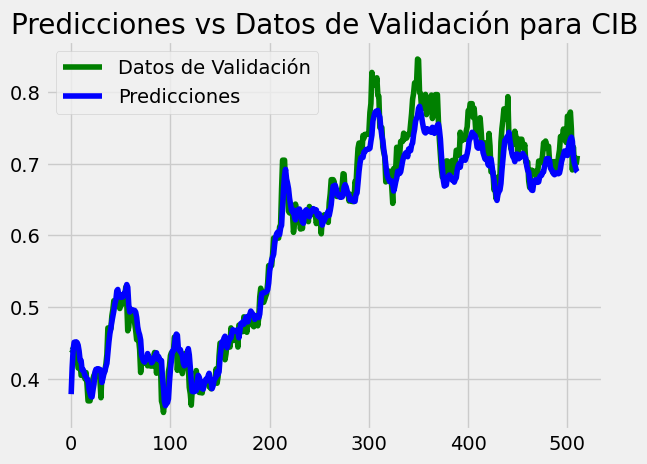

Error Medio Absoluto para CIB: 0.017781978933087514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/ste

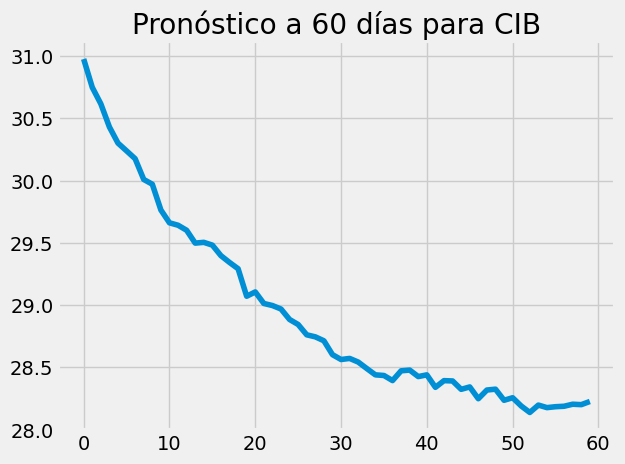

In [30]:
procesar_y_predecir(data_pronostico, 'CIB', steps=60)

### BBVA Model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,101 (113.68 KB)

 Trainable params: 29,101 (113.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1684 - mae: 0.1684 - val_loss: 0.1804 - val_mae: 0.1804
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mae: 0.0463 - val_loss: 0.1342 - val_mae: 0.1342
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mae: 0.0328 - val_loss: 0.0955 - val_mae: 0.0955
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mae: 0.0259 - val_loss: 0.0756 - val_mae: 0.0756
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mae: 0.0223 - val_loss: 0.0772 - val_mae: 0.0772
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0810 - val_mae: 0.0810
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0192 - mae: 0.0192 - val_loss: 0.0869 - val_mae: 0.0869
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - mae: 0.0181 - val_loss: 0.0875 - val_mae: 0.0875
Epoch 9/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mae

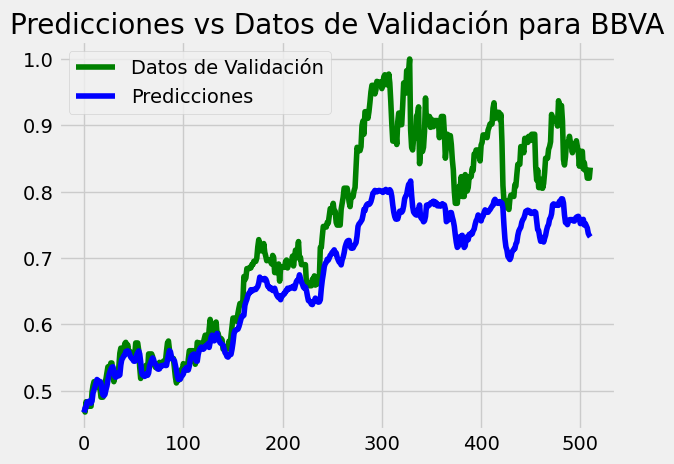

Error Medio Absoluto para BBVA: 0.0673588302570398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/ste

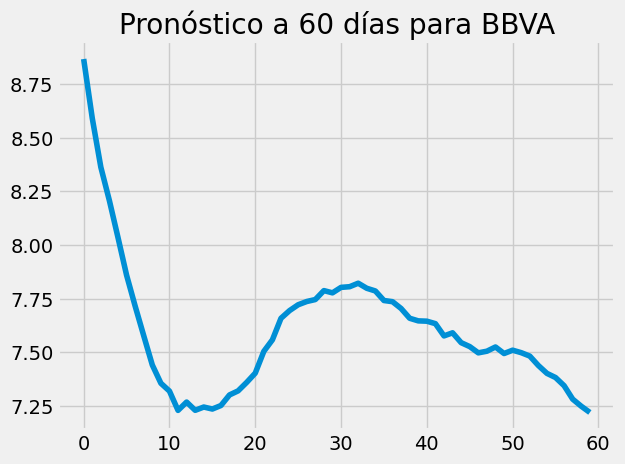

In [31]:
procesar_y_predecir(data_pronostico, 'BBVA', steps=60)

### REP.MC Model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,101 (113.68 KB)

 Trainable params: 29,101 (113.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2015 - mae: 0.2015 - val_loss: 0.0759 - val_mae: 0.0759
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0685 - mae: 0.0685 - val_loss: 0.0561 - val_mae: 0.0561
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0535 - mae: 0.0535 - val_loss: 0.0493 - val_mae: 0.0493
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0431 - mae: 0.0431 - val_loss: 0.0470 - val_mae: 0.0470
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0378 - mae: 0.0378 - val_loss: 0.0450 - val_mae: 0.0450
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0357 - mae: 0.0357 - val_loss: 0.0411 - val_mae: 0.0411
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0342 - mae: 0.0342 - val_loss: 0.0380 - val_mae: 0.0380
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mae: 0.0328 - val_loss: 0.0375 - val_mae: 0.0375
Epoch 9/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mae:

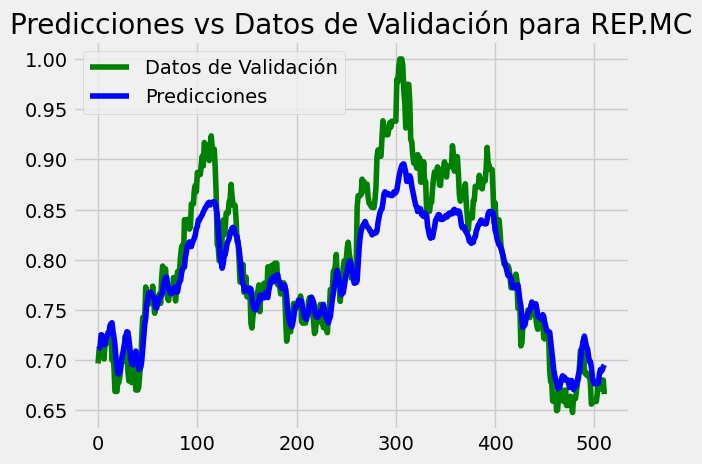

Error Medio Absoluto para REP.MC: 0.02488058711873599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/s

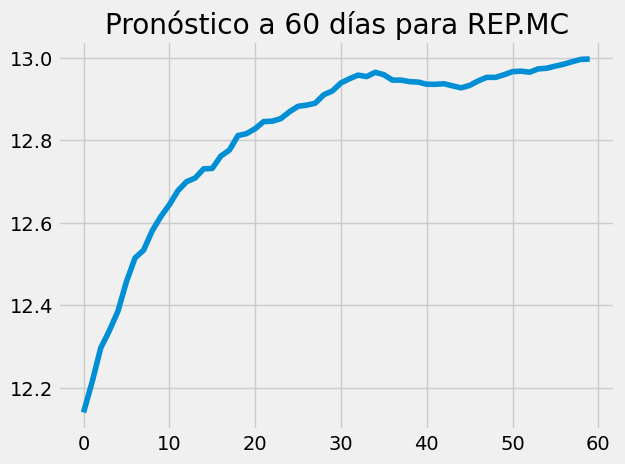

In [32]:
procesar_y_predecir(data_pronostico, 'REP.MC', steps=60)